In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
df = pd.read_csv(DATA_TRAIN_PATH, index_col="Id")

In [4]:
df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


### Choose columns types

In [5]:
df.nunique(axis=0)

Prediction                          2
DER_mass_MMC                   108338
DER_mass_transverse_met_lep    101637
DER_mass_vis                   100558
DER_pt_h                       115563
DER_deltaeta_jet_jet             7087
DER_mass_jet_jet                68366
DER_prodeta_jet_jet             16593
DER_deltar_tau_lep               4692
DER_pt_tot                      59042
DER_sum_pt                     156098
DER_pt_ratio_lep_tau             5931
DER_met_phi_centrality           2829
DER_lep_eta_centrality           1002
PRI_tau_pt                      59639
PRI_tau_eta                      4971
PRI_tau_phi                      6285
PRI_lep_pt                      61929
PRI_lep_eta                      4987
PRI_lep_phi                      6285
PRI_met                         87836
PRI_met_phi                      6285
PRI_met_sumet                  179740
PRI_jet_num                         4
PRI_jet_leading_pt              86590
PRI_jet_leading_eta              8558
PRI_jet_lead

In [6]:
#Convert columns with few unique values to categorical type for better perfomance
df.Prediction = df.Prediction.astype('category')
df.PRI_jet_num = df.PRI_jet_num.astype('category')


In [7]:
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,41.717235,-0.010119,209.797178,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,32.894693,1.812223,126.499506,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,0.109000,-3.142000,13.678000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,21.398000,-1.575000,123.017500,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,34.802000,-0.024000,179.739000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,51.895000,1.561000,263.379250,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,2842.617000,3.142000,2003.976000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


### Classify NaN values

Filter out -999 values. By removing the rows? Setting values to 0? Setting values to mean?
Currently label them NaN and remove them later.

In [8]:
df_clean = pd.read_csv(DATA_TRAIN_PATH, index_col="Id", na_values=-999)

In [9]:
df_clean.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591
std,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500
75%,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


### Remove empty columns

In [10]:
#Print proportion of missing data in each columns
empty_columns = pd.DataFrame({'percent_missing': df_clean.isnull().sum() / len(df_clean)})\
    .sort_values(by="percent_missing", ascending=False)
empty_columns.head(10)

,percent_missing
DER_lep_eta_centrality,0.709828
PRI_jet_subleading_phi,0.709828
PRI_jet_subleading_eta,0.709828
PRI_jet_subleading_pt,0.709828
DER_deltaeta_jet_jet,0.709828
DER_mass_jet_jet,0.709828
DER_prodeta_jet_jet,0.709828
PRI_jet_leading_eta,0.399652
PRI_jet_leading_phi,0.399652
PRI_jet_leading_pt,0.399652


We can see that around 70% of data is missing in the first 7 columns of the previous table. Should we remove them?

In [11]:
#remove columns with more than 40% of data missing
threshold = 0.4
removed = []
df_col_clean = df_clean.copy()
for col in df_col_clean.columns:
    if empty_columns.loc[col].percent_missing > threshold:
        df_col_clean.drop(col, axis=1, inplace=True)
        removed.append(col)
print("{} columns removed: [{}]".format(len(removed), ", ".join(removed)))

7 columns removed: [DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_lep_eta_centrality, PRI_jet_subleading_pt, PRI_jet_subleading_eta, PRI_jet_subleading_phi]


In [12]:
df_col_clean.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
count,211886.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,38.707419,...,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,73.064591
std,57.298157,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,22.412081,...,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,20.000000,...,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,0.000000
25%,91.885250,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,24.591750,...,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,31.804000,...,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,40.512500
75%,135.482000,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,45.017000,...,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,764.408000,...,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,1633.433000


### Remove outliers and NaN values
#### Z-score method
$z\_score = \dfrac{x-\mu}{\sigma}$

In [13]:
def z_score_clean(df):
    threshold = 3 # z score above threshold is labeled outlier
    df_outlier = df.copy()

    removed = {}

    #Only iterate over numeric columns
    num_cols = df_outlier.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        mean = df_outlier[col].mean()
        std = df_outlier[col].std()

        z_scores = abs((df_outlier[col] - mean) / std) 
        df_outlier = df_outlier[z_scores < threshold] #NaN values are filtered out as well
        removed[col] = len(df[col]) - len(df_outlier[col])

    print(pd.DataFrame.from_dict(data=removed, orient="index", columns=["Nb of outliers removed"]))
    return df_outlier

In [14]:
df_z_score = z_score_clean(df_col_clean)

                             Nb of outliers removed
DER_mass_MMC                                  42157
DER_mass_transverse_met_lep                   43215
DER_mass_vis                                  47156
DER_pt_h                                      50982
DER_deltar_tau_lep                            51011
DER_pt_tot                                    54167
DER_sum_pt                                    56941
DER_pt_ratio_lep_tau                          59841
DER_met_phi_centrality                        59841
PRI_tau_pt                                    63224
PRI_tau_eta                                   63224
PRI_tau_phi                                   63224
PRI_lep_pt                                    65887
PRI_lep_eta                                   65887
PRI_lep_phi                                   65887
PRI_met                                       69684
PRI_met_phi                                   69684
PRI_met_sumet                                 71213
PRI_jet_num 

In [15]:
df_col_clean.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
count,211886.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,38.707419,...,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,73.064591
std,57.298157,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,22.412081,...,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,20.000000,...,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,0.000000
25%,91.885250,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,24.591750,...,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,31.804000,...,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,40.512500
75%,135.482000,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,45.017000,...,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,764.408000,...,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,1633.433000


In [16]:
df_z_score.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
count,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,...,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000,105572.000000
mean,112.173110,36.588206,74.258333,67.825644,2.272039,17.806792,170.908315,1.340268,0.461163,37.423518,...,0.002531,0.052978,36.795816,0.000886,225.151305,1.509520,66.196619,-0.004900,-0.018651,90.119665
std,33.723372,27.633842,22.603001,37.685251,0.643615,16.805646,60.265381,0.661523,1.038071,15.275332,...,1.233996,1.813116,20.765727,1.814106,76.760336,0.654746,30.467550,1.854332,1.813357,52.706175
min,10.274000,0.000000,7.946000,0.000000,0.315000,0.000000,77.017000,0.292000,-1.414000,20.000000,...,-2.487000,-3.142000,0.200000,-3.142000,21.066000,1.000000,30.000000,-4.499000,-3.142000,30.000000
25%,91.244500,12.756750,59.352750,39.169750,1.808000,3.035000,122.459500,0.839000,-0.418000,25.439000,...,-0.943000,-1.507000,21.345750,-1.572000,167.864000,1.000000,41.844750,-1.414000,-1.591000,44.640000
50%,109.995500,30.849000,71.730500,59.357000,2.313000,13.533500,158.180000,1.215000,0.989000,32.932000,...,0.007000,0.100000,33.613500,0.000000,216.675000,1.000000,57.981000,-0.007000,-0.045000,76.969500
75%,130.586250,56.583250,86.650500,89.768250,2.773000,27.782250,208.561750,1.702000,1.350000,45.387000,...,0.944000,1.621000,48.266250,1.573000,274.966500,2.000000,83.018250,1.404000,1.555000,122.831750
max,293.558000,130.817000,163.517000,249.445000,4.500000,79.329000,425.017000,3.675000,1.414000,89.822000,...,2.497000,3.141000,106.361000,3.142000,462.282000,3.000000,171.474000,4.492000,3.141000,260.912000


We can see that the metrics such as the mean or quartiles didn't change much yet the max values and the standard deviation decreased. 

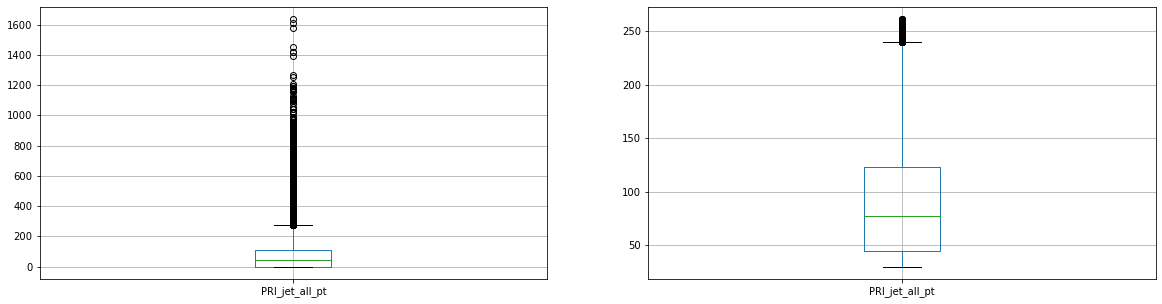

In [17]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

df_clean.boxplot('PRI_jet_all_pt',ax = axs[0]);
df_z_score.boxplot('PRI_jet_all_pt',ax = axs[1]);


Issue with Z-score method: the z-score depends on the mean and std that are easily influenced by outliers. The IQR method depends on quartiles that are computed from medians wich is more robust with outliers.

#### Interquartile range method

$IQR = Q3 - Q1$

$boundaries = Q3 \pm 1.5*IQR$

In [18]:
def iqr_clean(df):
    df_outlier = df.copy()

    removed = {}

    #Only iterate over numeric columns
    num_cols = df_outlier.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        Q1 = df_outlier[col].quantile(0.25)
        Q3 = df_outlier[col].quantile(0.75)
        IQR = Q3 - Q1

        # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
        vals = df_outlier[col]
        df_outlier = df_outlier.query('(@Q1 - 1.5 * @IQR) <= @vals <= (@Q3 + 1.5 * @IQR)')
        removed[col] = len(df[col]) - len(df_outlier[col])
        
    print(pd.DataFrame.from_dict(data=removed, orient="index", columns=["Nb of outliers removed"]))
    return df_outlier

In [19]:
df_iqr = iqr_clean(df_col_clean)

                             Nb of outliers removed
DER_mass_MMC                                  51578
DER_mass_transverse_met_lep                   52163
DER_mass_vis                                  56088
DER_pt_h                                      66940
DER_deltar_tau_lep                            66983
DER_pt_tot                                    72037
DER_sum_pt                                    76252
DER_pt_ratio_lep_tau                          81373
DER_met_phi_centrality                        81373
PRI_tau_pt                                    87457
PRI_tau_eta                                   87457
PRI_tau_phi                                   87457
PRI_lep_pt                                    90908
PRI_lep_eta                                   90908
PRI_lep_phi                                   90908
PRI_met                                       97804
PRI_met_phi                                   97804
PRI_met_sumet                                100176
PRI_jet_num 

In [20]:
df_iqr.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
count,75153.000000,75153.000000,75153.000000,75153.000000,75153.000000,75153.000000,75153.000000,75153.000000,75153.000000,75153.000000,...,75153.000000,75153.000000,75153.000000,75153.000000,75153.000000,75153.000000,75153.000000,75153.00000,75153.000000,75153.000000
mean,108.182890,36.060834,72.482304,57.309708,2.355437,14.866848,147.057319,1.303108,0.423131,35.355603,...,0.003602,0.057348,32.355240,-0.000932,200.302167,1.318936,56.996214,-0.00624,-0.028276,70.586752
std,28.515709,26.643437,18.869470,28.187694,0.583639,14.226765,40.964417,0.563407,1.062115,12.424488,...,1.239860,1.813169,16.138006,1.813902,61.105857,0.466067,21.920464,1.89853,1.816068,34.863006
min,26.503000,0.000000,18.561000,0.000000,0.498000,0.001000,77.017000,0.365000,-1.414000,20.000000,...,-2.487000,-3.142000,0.200000,-3.142000,21.066000,1.000000,30.000000,-4.49900,-3.142000,30.000000
25%,89.945000,12.816000,59.640000,36.348000,1.962000,2.650000,114.356000,0.865000,-0.580000,25.223000,...,-0.950000,-1.504000,19.926000,-1.574000,155.303000,1.000000,39.050000,-1.44400,-1.605000,40.485000
50%,107.481000,31.040000,71.080000,52.210000,2.404000,8.460000,139.423000,1.212000,0.967000,32.098000,...,0.010000,0.115000,30.883000,0.001000,195.690000,1.000000,51.495000,-0.00500,-0.066000,61.646000
75%,126.904000,55.953000,84.338000,74.388000,2.807000,25.124000,173.854000,1.641000,1.356000,42.879000,...,0.949000,1.623000,43.287000,1.572000,240.656000,2.000000,70.187000,1.42700,1.549000,93.861000
max,200.696000,130.053000,130.618000,183.136000,4.375000,64.148000,306.458000,3.018000,1.414000,71.548000,...,2.493000,3.141000,74.592000,3.142000,380.209000,2.000000,124.903000,4.49200,3.141000,177.075000


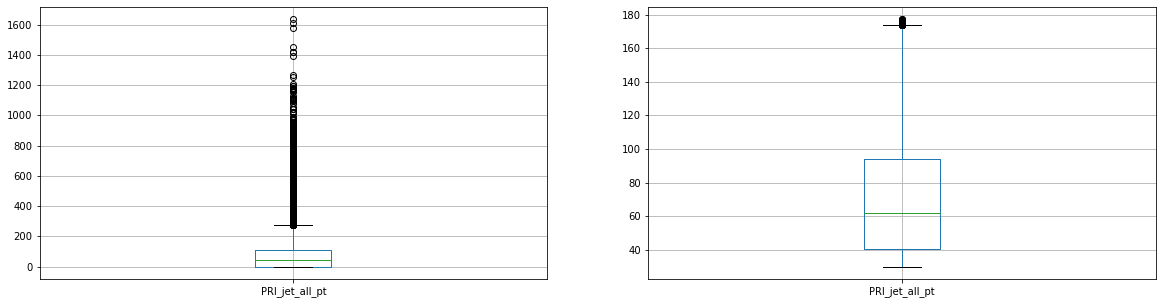

In [21]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

df_clean.boxplot('PRI_jet_all_pt',ax = axs[0]);
df_iqr.boxplot('PRI_jet_all_pt',ax = axs[1]);



In [22]:
df_final = df_iqr.copy()

### Correlation matrix

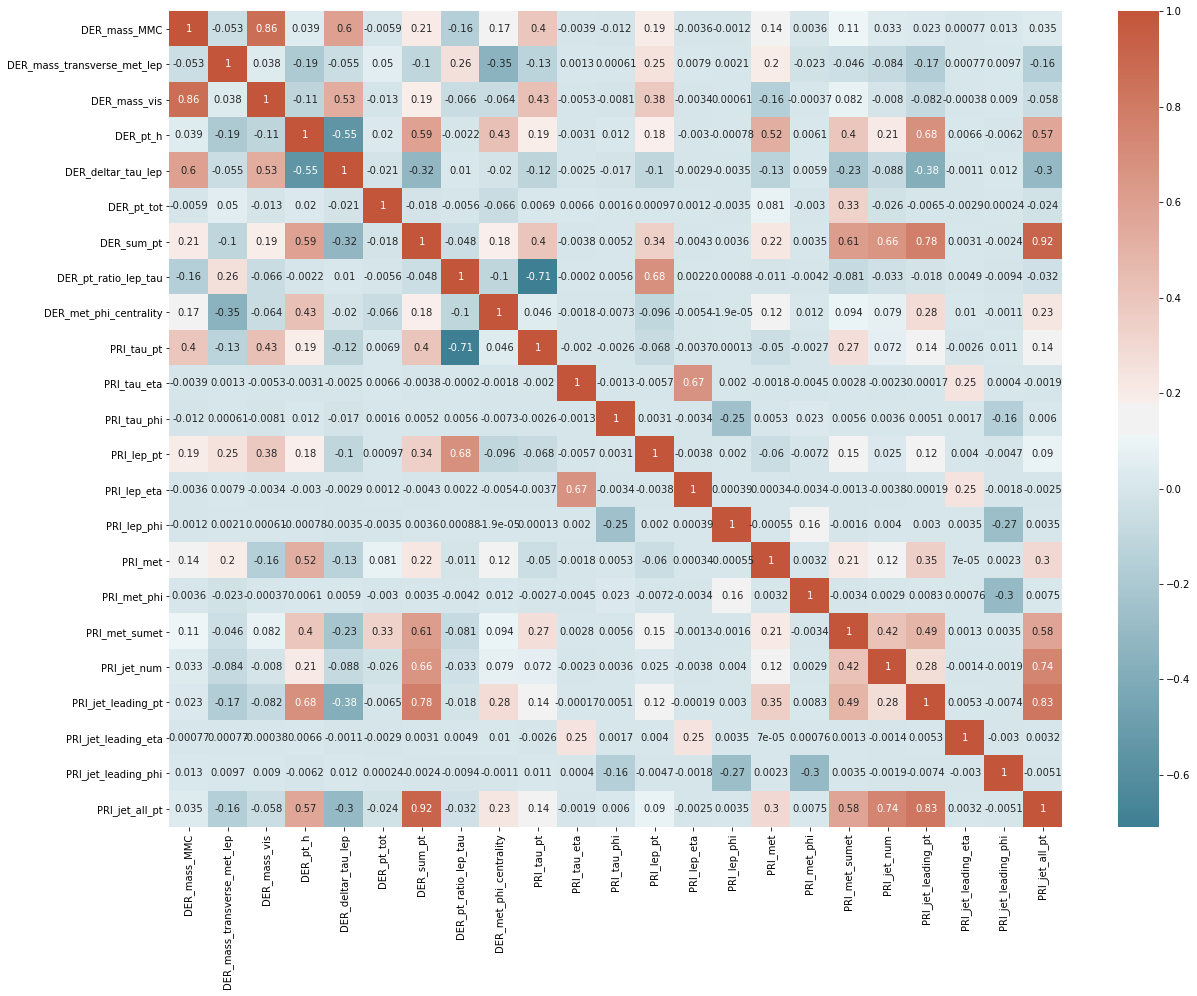

In [23]:
# calculate correlation matrix
plt.figure(figsize=(20,15))
corr = df_final.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True));

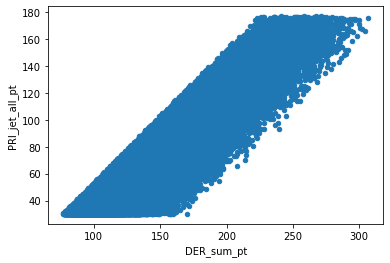

In [24]:
df_final.plot(kind='scatter', x='DER_sum_pt', y='PRI_jet_all_pt');

In [25]:
continuous_df = df_final.loc[:, (df_final.columns != 'Prediction') & (df_final.columns != 'PRI_jet_num')]
continuous_df = (continuous_df - continuous_df.mean(axis=0)) / continuous_df.std(axis=0)

In [26]:
df_final.loc[:, (df_final.columns != 'Prediction') & (df_final.columns != 'PRI_jet_num')] = continuous_df
df_final.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
count,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04,...,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04,75153.000000,7.515300e+04,7.515300e+04,7.515300e+04,7.515300e+04
mean,-1.321413e-14,1.806192e-14,-7.712405e-15,-2.015047e-14,-2.130713e-14,1.593670e-15,3.476110e-14,2.351879e-15,-8.128957e-16,-3.250145e-14,...,3.267530e-17,-2.425242e-16,2.841229e-14,-3.429071e-17,-2.167407e-15,1.318936,1.018116e-14,-5.274789e-17,3.535269e-17,8.348955e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.466067,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.864382e+00,-1.353460e+00,-2.857595e+00,-2.033146e+00,-3.182510e+00,-1.044921e+00,-1.709784e+00,-1.665063e+00,-1.729691e+00,-1.235914e+00,...,-2.008777e+00,-1.764506e+00,-1.992516e+00,-1.731664e+00,-2.933208e+00,1.000000,-1.231553e+00,-2.366441e+00,-1.714542e+00,-1.164178e+00
25%,-6.395735e-01,-8.724412e-01,-6.805864e-01,-7.436475e-01,-6.741108e-01,-8.587229e-01,-7.982860e-01,-7.776045e-01,-9.444655e-01,-8.155348e-01,...,-7.691208e-01,-8.611152e-01,-7.701844e-01,-8.672290e-01,-7.364133e-01,1.000000,-8.186968e-01,-7.573015e-01,-8.682076e-01,-8.634296e-01
50%,-2.461417e-02,-1.884454e-01,-7.431603e-02,-1.809197e-01,8.320661e-02,-4.503377e-01,-1.863646e-01,-1.617086e-01,5.120622e-01,-2.621921e-01,...,5.160165e-03,3.179645e-02,-9.122812e-02,1.064964e-03,-7.547831e-02,1.000000,-2.509625e-01,6.533631e-04,-2.077236e-02,-2.564538e-01
75%,6.565192e-01,7.466066e-01,6.283004e-01,6.058776e-01,7.737019e-01,7.209757e-01,6.541453e-01,5.997305e-01,8.783126e-01,6.055298e-01,...,7.625038e-01,8.634893e-01,6.773923e-01,8.671538e-01,6.603922e-01,2.000000,6.017567e-01,7.549211e-01,8.685116e-01,6.675916e-01
max,3.244286e+00,3.527779e+00,3.080940e+00,4.463873e+00,3.460294e+00,3.463975e+00,3.891199e+00,3.043790e+00,9.329206e-01,2.912989e+00,...,2.007806e+00,1.700697e+00,2.617223e+00,1.732691e+00,2.944183e+00,2.000000,3.097872e+00,2.369328e+00,1.745131e+00,3.054477e+00


In [28]:
df_final

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,s,1.062120,0.585291,1.343159,-1.040515,1.214043,1.902130,1.237725,0.495010,0.915973,...,1.830366,-1.362999,-0.962401,-0.152196,0.956223,2,0.476212,1.135742,0.260054,1.230825
100001,b,1.850002,1.227588,1.629759,-0.325096,1.914818,-0.898929,-0.534618,-0.752756,0.932921,...,0.401173,0.025178,0.765197,-1.055773,-0.585151,1,-0.491331,0.385161,0.653211,-0.698756
100012,b,1.301532,1.057415,1.647248,1.762801,-0.295452,0.688361,1.103096,-1.290555,0.250320,...,0.579419,-0.050932,0.715997,-1.050811,0.524661,1,1.647811,-0.507635,1.085464,0.646251
100016,b,0.212974,-1.190156,-0.239504,-0.357912,1.025570,0.799630,-1.126034,-0.280628,-0.193134,...,-0.176312,1.038873,0.591384,1.133431,-0.142935,1,-0.945838,-0.400183,-0.362169,-0.984532
100026,s,1.017478,1.199101,0.308101,-0.779692,0.903919,-1.030652,-0.780588,-0.014391,0.922564,...,1.339182,0.613651,-0.017675,-1.593288,-1.932354,1,-0.979414,2.292953,-0.077488,-1.005643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349980,s,0.412092,-0.599879,0.862170,-0.783417,0.761708,0.257624,1.028714,1.149955,-0.112164,...,-0.256966,-0.890897,-1.873976,0.615762,0.605897,2,0.557597,-0.557147,0.631186,1.214790
349987,b,1.118580,-0.237651,0.578220,-1.752244,0.544108,1.694563,-0.342207,-1.656188,-1.666610,...,-1.429679,-0.129799,0.912613,0.385320,-0.238261,1,-0.933019,-1.389369,0.575571,-0.976472
349988,b,-0.654863,1.884748,0.391516,-0.023901,-1.107598,0.606754,0.170042,-0.742106,-1.151599,...,0.171308,-0.591973,0.673303,1.072237,-0.406805,1,0.207924,-1.498401,1.630598,-0.259093


In [26]:
df_final.to_csv("../data/train_clean.csv")